In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

df = pd.read_csv('train_features.csv')


In [2]:
df.isna().sum()
#Standard Missing Values

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [3]:
missing_values = ["n/a", "na", "--"]
df = pd.read_csv("train_features.csv", na_values = missing_values)
df.isna().sum()
#Non-Standard Missing Values

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [4]:
duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :") 
  
# Print the resultant Dataframe 
duplicate 

Duplicate Rows :


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis


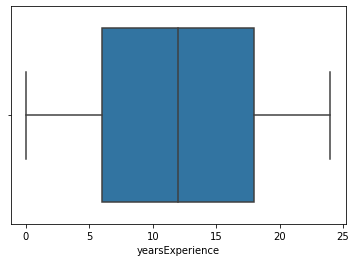

In [5]:

sn.boxplot(x=df['yearsExperience'])

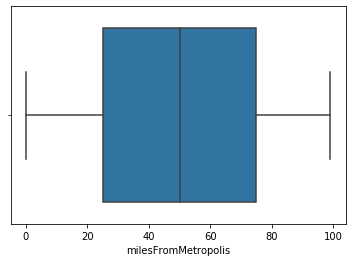

In [6]:

sn.boxplot(x=df['milesFromMetropolis'])

In [7]:
df1 = pd.read_csv('train_salaries.csv')
print (df1.dtypes)
print(df1.head())

jobId     object
salary     int64
dtype: object
              jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163


In [8]:
df1.isna().sum()

jobId     0
salary    0
dtype: int64

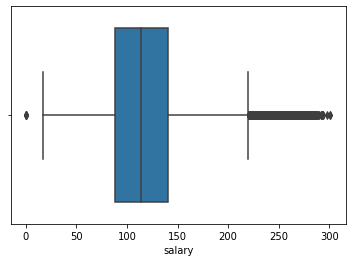

In [9]:
sn.boxplot(x=df1['salary'])

In [10]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [11]:
lowerbound,upperbound = outlier_treatment(df1.salary)
print(lowerbound,upperbound)

8.5 220.5


In [12]:
df1[(df1.salary < lowerbound) | (df1.salary > upperbound)]
df1.drop(df1[ (df1.salary > upperbound) | (df1.salary < lowerbound) ].index , inplace=True) # dropping outliers


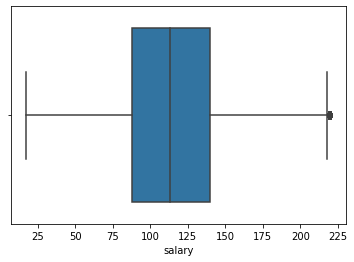

In [13]:
sn.boxplot(x=df1['salary'])

In [14]:
x = df[['milesFromMetropolis']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
# View the dataframe
df_normalized
b = df[['yearsExperience']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
b_scaled = min_max_scaler.fit_transform(b)

# Run the normalizer on the dataframe
df_normalized1 = pd.DataFrame(b_scaled)
# View the dataframe
df_normalized1
print(df_normalized)
print(df_normalized1)

               0
0       0.838384
1       0.737374
2       0.383838
3       0.171717
4       0.161616
...          ...
999995  0.949495
999996  0.353535
999997  0.818182
999998  0.050505
999999  0.111111

[1000000 rows x 1 columns]
               0
0       0.416667
1       0.125000
2       0.416667
3       0.333333
4       0.333333
...          ...
999995  0.791667
999996  0.500000
999997  0.666667
999998  0.250000
999999  0.833333

[1000000 rows x 1 columns]


In [15]:
df5=pd.concat((df,df_normalized),axis=1)

df5=df5.drop(['milesFromMetropolis', 'yearsExperience'], axis = 1) 
df5.rename(columns = {0:'milesFromMetropolis'}, inplace = True) 
print(df5.head())
df5=pd.concat((df5,df_normalized1),axis=1)
df5.rename(columns = {0:'yearsExperience'}, inplace = True) 


              jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  milesFromMetropolis  
0   HEALTH             0.838384  
1      WEB             0.737374  
2   HEALTH             0.383838  
3     AUTO             0.171717  
4  FINANCE             0.161616  


In [16]:
df3=pd.merge(df5,df1)

In [17]:
new=pd.get_dummies(data=df5, columns=['jobType', 'degree','major','industry'])
data=pd.merge(df5,new)
data=data.drop(['jobType','major','degree','industry'],axis=1)
data


,jobId,companyId,milesFromMetropolis,yearsExperience,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,JOB1362684407687,COMP37,0.838384,0.416667,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,JOB1362684407688,COMP19,0.737374,0.125000,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,JOB1362684407689,COMP52,0.383838,0.416667,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,JOB1362684407690,COMP38,0.171717,0.333333,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,JOB1362684407691,COMP7,0.161616,0.333333,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,0.949495,0.791667,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
999996,JOB1362685407683,COMP24,0.353535,0.500000,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
999997,JOB1362685407684,COMP23,0.818182,0.666667,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
999998,JOB1362685407685,COMP3,0.050505,0.250000,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [18]:
df2=pd.merge(data,df1)
df2

,jobId,companyId,milesFromMetropolis,yearsExperience,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,...,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,salary
0,JOB1362684407687,COMP37,0.838384,0.416667,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,130
1,JOB1362684407688,COMP19,0.737374,0.125000,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,101
2,JOB1362684407689,COMP52,0.383838,0.416667,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,137
3,JOB1362684407690,COMP38,0.171717,0.333333,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,142
4,JOB1362684407691,COMP7,0.161616,0.333333,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992873,JOB1362685407682,COMP56,0.949495,0.791667,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,88
992874,JOB1362685407683,COMP24,0.353535,0.500000,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,160
992875,JOB1362685407684,COMP23,0.818182,0.666667,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,64
992876,JOB1362685407685,COMP3,0.050505,0.250000,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,149


In [41]:
X = df2.iloc[:,2:33]

y = df2.loc[:,'salary'] #dependent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [20]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 19.20127915488817


In [21]:
testr=pd.read_csv('test_features.csv')
x = testr[['milesFromMetropolis']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
# View the dataframe
df_normalized
b = testr[['yearsExperience']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
b_scaled = min_max_scaler.fit_transform(b)

# Run the normalizer on the dataframe
df_normalized1 = pd.DataFrame(b_scaled)
# View the dataframe
df_normalized1
print(df_normalized)
print(df_normalized1)

               0
0       0.737374
1       0.474747
2       0.090909
3       0.969697
4       0.444444
...          ...
999995  0.030303
999996  0.676768
999997  0.919192
999998  0.636364
999999  0.313131

[1000000 rows x 1 columns]
               0
0       0.916667
1       0.833333
2       0.708333
3       0.583333
4       0.416667
...          ...
999995  0.583333
999996  0.833333
999997  0.041667
999998  0.583333
999999  0.666667

[1000000 rows x 1 columns]


In [22]:
df4=pd.concat((testr,df_normalized),axis=1)

df4=df4.drop(['milesFromMetropolis', 'yearsExperience'], axis = 1) 
df4.rename(columns = {0:'milesFromMetropolis'}, inplace = True) 
print(df4.head())
df4=pd.concat((df4,df_normalized1),axis=1)
df4.rename(columns = {0:'yearsExperience'}, inplace = True) 
print(df4.head())

              jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOCTORAL  BIOLOGY      OIL   

   milesFromMetropolis  
0             0.737374  
1             0.474747  
2             0.090909  
3             0.969697  
4             0.444444  
              jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOC

In [44]:
new=pd.get_dummies(data=df4, columns=['jobType', 'degree','major','industry'])
data1=pd.merge(df4,new)
data1=data1.drop(['jobType','major','degree','industry'],axis=1)
data1
g = data1.iloc[:,2:33]


(1000000, 31)

In [46]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)
pred=rdg.predict(g)
pred=pred.astype(np.uint8)
dff= pd.DataFrame(pred,columns =['salary']) 
gfg = pd.DataFrame(testr['jobId'],columns=['jobId']) 
dfd=pd.concat([gfg,dff],axis=1)
dfd.to_csv(r'test_salaries.csv', index = False)
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred_rdg))
rms #rms on training set.

19.201276594385533

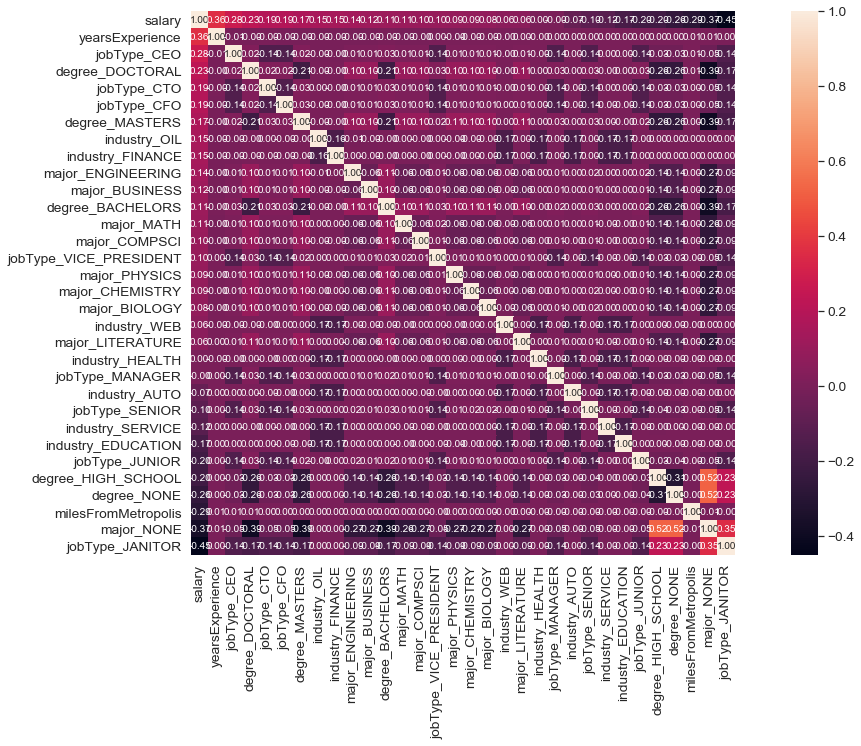

In [25]:
corrmat = df2.corr()
plt.figure(figsize=(20,10))
k = 32 #number of variables for heatmap
cols = corrmat.nlargest(k, 'salary')['salary'].index
cm = np.corrcoef(df2[cols].values.T)
sn.set(font_scale=1.25)
hm = sn.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()